### ICTP-IAEA WORKSHOOP ON ENVIRONMENTAL MAPPING: Mobilising	Trust	in Measurements	and	Engaging Scientific Citizenry, Trieste, March 2017
---

# IV. Using Python as a GIS

In [148]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
#import pysal as ps
#from pysal.contrib.viz import mapping as maps
#import palettable as pltt
#from seaborn import palplot

## Loading a shapefile

In [3]:
path = 'data/shp/JPN_adm2.shp'
jpn_muni = gpd.read_file(path)

In [4]:
jpn_muni.head()

,CCA_2,CCN_2,ENGTYPE_2,HASC_2,ID_0,ID_1,ID_2,ISO,NAME_0,NAME_1,NAME_2,NL_NAME_2,TYPE_2,VARNAME_2,geometry
0,None,0,Town,None,114,1,1,JPN,Japan,Aichi,Agui,阿久比町,Machi,None,"POLYGON ((136.8802795410159 34.91983413696295,..."
1,None,0,City,None,114,1,2,JPN,Japan,Aichi,Aisai,愛西市,Shi,None,"POLYGON ((136.7043914794922 35.11997222900396,..."
2,None,0,City,None,114,1,3,JPN,Japan,Aichi,Anjō,安城市,Shi,None,"POLYGON ((137.1106567382812 34.89692687988276,..."
3,None,0,City,None,114,1,4,JPN,Japan,Aichi,Ōbu,大府市,Shi,None,"POLYGON ((136.9826965332031 34.99448013305675,..."
4,None,0,Town,None,114,1,5,JPN,Japan,Aichi,Ōguchi,大口町,Machi,None,"POLYGON ((136.9320678710938 35.31656265258795,..."


In [5]:
type(jpn_muni)

geopandas.geodataframe.GeoDataFrame

In [6]:
jpn_muni = jpn_muni[['NAME_1', 'NAME_2', 'geometry']]

In [7]:
jpn_muni.columns = ['prefecture', 'municipality', 'geometry']

In [8]:
jpn_muni.head()

,prefecture,municipality,geometry
0,Aichi,Agui,"POLYGON ((136.8802795410159 34.91983413696295,..."
1,Aichi,Aisai,"POLYGON ((136.7043914794922 35.11997222900396,..."
2,Aichi,Anjō,"POLYGON ((137.1106567382812 34.89692687988276,..."
3,Aichi,Ōbu,"POLYGON ((136.9826965332031 34.99448013305675,..."
4,Aichi,Ōguchi,"POLYGON ((136.9320678710938 35.31656265258795,..."


In [9]:
jpn_muni.shape

(1811, 3)

In [10]:
# Selecting only Fukushima municipalities
fuku_pref = jpn_muni[jpn_muni['prefecture'] == 'Fukushima']

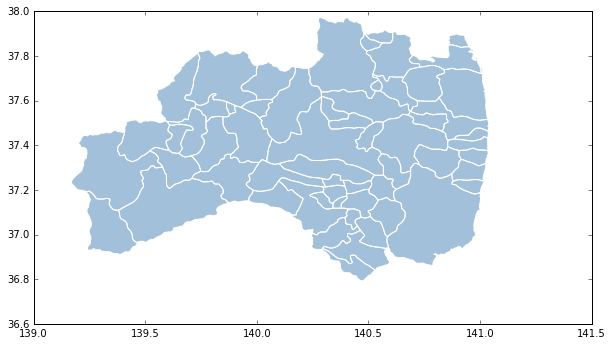

In [30]:
# Simple plot
plt.rcParams["figure.figsize"] = [10, 10]
fuku_pref.plot(facecolor='steelblue', edgecolor='white')

In [31]:
fuku_pref.crs

{'init': u'epsg:4326'}

## Spatial query

In [35]:
f = 'data/safecast_subset.csv'    # Path to file containing the table
df = pd.read_csv(f)    # Read the table in

In [36]:
df.head()

,id,value,captured_at,latitude,longitude
0,15500999,20283,2012-01-18,37.414865,141.028495
1,15500998,19713,2012-01-18,37.414992,141.028215
2,15501000,20667,2012-01-18,37.414817,141.028568
3,15501002,21206,2012-01-18,37.414787,141.028612
4,15501003,21220,2012-01-18,37.414777,141.028622


In [39]:
fuku_pref['geometry'].head()

288    POLYGON ((139.8783416748047 37.53739547729492,...
289    POLYGON ((139.7485809326173 37.28300857543951,...
290    POLYGON ((140.0434722900392 37.32676696777344,...
291    POLYGON ((140.9058074951173 37.37606430053711,...
292    POLYGON ((140.411865234375 37.53867721557629, ...
Name: geometry, dtype: object

### Topology check [Optional]

In [58]:
# Checking if polygon contains a point
p1 = Point(141.028495,37.414865)
fuku_pref['geometry'].contains(p1)

288    False
289    False
290    False
291     True
292    False
293    False
294    False
295    False
296    False
297    False
298    False
299    False
300    False
301    False
302    False
303    False
304    False
305    False
306    False
307    False
308    False
309    False
310    False
311    False
312    False
313    False
314    False
315    False
316    False
317    False
318    False
319    False
320    False
321    False
322    False
323    False
324    False
325    False
326    False
327    False
328    False
329    False
330    False
331    False
332    False
333    False
334    False
335    False
336    False
337    False
338    False
339    False
340    False
341    False
342    False
343    False
344    False
345    False
346    False
347    False
dtype: bool

In [78]:
print(fuku_pref[fuku_pref['geometry'].contains(p1)]['municipality'].iloc[0])

Ōkuma


In [79]:
df.head()

,id,value,captured_at,latitude,longitude
0,15500999,20283,2012-01-18,37.414865,141.028495
1,15500998,19713,2012-01-18,37.414992,141.028215
2,15501000,20667,2012-01-18,37.414817,141.028568
3,15501002,21206,2012-01-18,37.414787,141.028612
4,15501003,21220,2012-01-18,37.414777,141.028622


In [161]:
# Convert dataframe to geodataframe
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
df = df.drop(['longitude', 'latitude'], axis=1)
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [162]:
municipality = []
for p in geo_df.geometry:
    mask = fuku_pref['geometry'].contains(p)
    if any(mask):
        match = fuku_pref[fuku_pref['geometry'].contains(p)]['municipality'].iloc[0]
    else:
        match = ''
    municipality.append(match)

In [159]:
geo_df['municipality'] = municipality

In [163]:
geo_df.head()

,id,value,captured_at,municipality,geometry
0,15500999,20283,2012-01-18,Ōkuma,POINT (141.028495 37.414865)
1,15500998,19713,2012-01-18,Ōkuma,POINT (141.028215 37.414991666667)
2,15501000,20667,2012-01-18,Ōkuma,POINT (141.02856833333 37.414816666667)
3,15501002,21206,2012-01-18,Ōkuma,POINT (141.02861166667 37.414786666667)
4,15501003,21220,2012-01-18,Ōkuma,POINT (141.02862166667 37.414776666667)


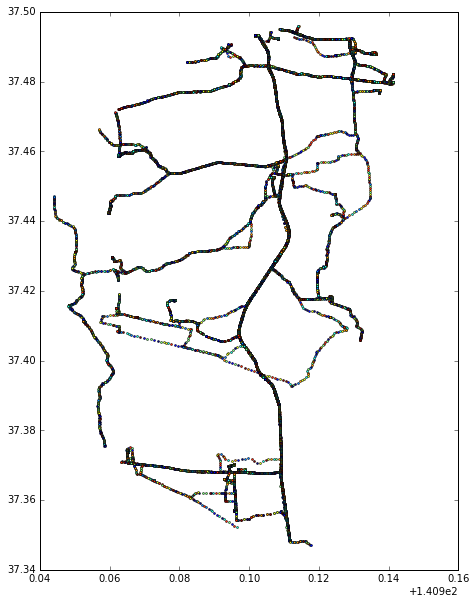

In [165]:
plt.rcParams["figure.figsize"] = [10, 10]
geo_df.plot()